# Capstone Project - The Battle of Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

# Enhanced BI towards tourist activity in Fano Italy

## Introduction

####  About the project:

1) Turism is one of the main drivers of a lot of italian cities during high season, sometimes being the mein income source of a lot of families and small business. However, it can be a strungle for some tourists to find the right neighborhood in a way that they can explore the gastronomic scenario of the region. On the other hand, knowing in which part of the city there are an aglomeration of tourits can further enhance the business focus/restaurants of the city in order to enhence the local economy.

#### About the data:

2) To achive this, we will use the data provived by foursquare to access the location of hotels & restaurants in the city of Fano (Marche, Italy). 
The data will be grouped in two groups, one group will be a cluster of the available hotels spread around the city and the second group will be a cluster of the available restaurants.
Moreoever, we will use k-means clustering to divide the data into the city's neighborhood of the two groups and acces the restaurant/hotel density in each of the neighborhoods in a way that it can yield the locations with the highest/lowest probability for tourist activity and density of restaurants in the city.

## The Data

In [303]:
import requests 
import pandas as pd
import numpy as np 
import random

from geopy.geocoders import Nominatim 

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from IPython.display import display_html
import pandas as pd
import numpy as np    

from pandas.io.json import json_normalize

import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [424]:
CLIENT_ID = '3FU5PP31OVR2BAVONMQTODK2SZM3IRTD3JOO40VESVYDYUVF' # your Foursquare ID
CLIENT_SECRET = 'IX5KRXMDRWME5PMG5Z1A5JZNWYVGH3SPAFXWBA204O0X5WMF' # your Foursquare Secret
ACCESS_TOKEN = 'R2PQUU3K5P1BGXARXYWPZV04KSB0C1KY5WP4RDSU0AO3Y3M0' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 150
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3FU5PP31OVR2BAVONMQTODK2SZM3IRTD3JOO40VESVYDYUVF
CLIENT_SECRET:IX5KRXMDRWME5PMG5Z1A5JZNWYVGH3SPAFXWBA204O0X5WMF


####  Where are acces the data of the hotels and restaurants in Fano withim a 50km Radios through the Foursquare API 

In [425]:
"""
latitude, Longitude of Fano, Italy
"""

latitude = 43.844872 
longitude = 13.016880

#Searching restaurants in the whole city radius

radius = 5000

search_query = 'ristorante'

In [426]:
"""
latitude, Longitude of Fano, Italy
"""

latitude = 43.844872 
longitude = 13.016880

#Searching restaurants in a radius of 100 km.
search_query2 = 'hotel'

In [459]:
#Getting the location of restaurants

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=3FU5PP31OVR2BAVONMQTODK2SZM3IRTD3JOO40VESVYDYUVF&client_secret=IX5KRXMDRWME5PMG5Z1A5JZNWYVGH3SPAFXWBA204O0X5WMF&ll=43.844872,13.01688&oauth_token=R2PQUU3K5P1BGXARXYWPZV04KSB0C1KY5WP4RDSU0AO3Y3M0&v=20180604&query=ristorante&radius=5000&limit=150'

In [460]:
#Getting the location of hotels
url_hotel = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query2, radius, LIMIT)
results_hotel = requests.get(url_hotel).json()
results_hotel

{'meta': {'code': 200, 'requestId': '60e2b131981d040fd4c7ed0f'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4e7bb3f5b0fb653f849e8e18',
    'name': 'Hotel  Augustus',
    'location': {'address': 'Via Giacomo Puccini, 2',
     'lat': 43.84747,
     'lng': 13.01268,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.84747,
       'lng': 13.01268}],
     'distance': 444,
     'postalCode': '61032',
     'cc': 'IT',
     'city': 'Fano',
     'state': 'Marche',
     'country': 'Italia',
     'formattedAddress': ['Via Giacomo Puccini, 2',
      '61032 Fano Marche',
      'Italia']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1625469233',
    'hasPerk': False},
   {'id': '58f

In [429]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60e2af8fd73db71389f26a17'},
 'notifications': [{'type': 'notificationTray', 'item': {'unreadCount': 0}}],
 'response': {'venues': [{'id': '4e3ed718d22d102e8554539e',
    'name': 'Ristorante Cinese Asia',
    'location': {'address': 'Via Carlo Pisacane 106',
     'lat': 43.8398410279987,
     'lng': 13.029103358750154,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.8398410279987,
       'lng': 13.029103358750154}],
     'distance': 1129,
     'cc': 'IT',
     'city': 'Fano',
     'state': 'Marche',
     'country': 'Italia',
     'formattedAddress': ['Via Carlo Pisacane 106', 'Fano Marche', 'Italia']},
    'categories': [{'id': '4bf58dd8d48988d111941735',
      'name': 'Japanese Restaurant',
      'pluralName': 'Japanese Restaurants',
      'shortName': 'Japanese',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/japanese_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1625468815',
    'ha

In [461]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues_hotel = results_hotel['response']['venues']

# tranform venues into a dataframe
dataframe = pd.json_normalize(venues)
dataframe2 = pd.json_normalize(venues_hotel)
df = dataframe
df_hotel = dataframe2
df.head(50)

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.crossStreet,location.postalCode,location.neighborhood
0,4e3ed718d22d102e8554539e,Ristorante Cinese Asia,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",v-1625468815,False,Via Carlo Pisacane 106,43.839841,13.029103,"[{'label': 'display', 'lat': 43.8398410279987,...",1129,IT,Fano,Marche,Italia,"[Via Carlo Pisacane 106, Fano Marche, Italia]",NaN,NaN,NaN
1,4da83ac743a12d0c264b7f38,Il Cantinone Ristorante,"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",v-1625468815,False,60 Via Arco di Augusto,43.844461,13.016103,"[{'label': 'display', 'lat': 43.84446132923227...",77,IT,Fano,Marche,Italia,"[60 Via Arco di Augusto (Corso G. Matteotti), ...",Corso G. Matteotti,NaN,NaN
2,4eed0dd8775b3c580d0dbe99,Ristorante Giapponese Cinese,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",v-1625468815,False,Cristoforo Colombo,43.846983,13.019557,"[{'label': 'display', 'lat': 43.8469830446704,...",318,IT,Fano,Marche,Italia,"[Cristoforo Colombo, 61032 Fano Marche, Italia]",NaN,61032,NaN
3,5259a06411d2558313a990f9,Ristorante Pizzeria hotel orfeo,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",v-1625468815,False,"Corso Matteotti, 5",43.846098,13.013366,"[{'label': 'display', 'lat': 43.8460977, 'lng'...",313,IT,Fano,Marche,Italia,"[Corso Matteotti, 5, 61032 Fano Marche, Italia]",NaN,61032,NaN
4,4d41be6ccb84b60c350f92ab,Ristorante Isolabelgatto,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1625468815,False,NaN,43.854769,12.987914,"[{'label': 'display', 'lat': 43.8547690168002,...",2573,IT,Fano,Marche,Italia,"[Fano Marche, Italia]",NaN,NaN,NaN
5,4e2c6c848877b69d49ea884b,Ristorante La Liscia Da Ori,"[{'id': '4bf58dd8d48988d1ce941735', 'name': 'S...",v-1625468815,False,Viale Cairoli,43.846865,13.012134,"[{'label': 'display', 'lat': 43.846865, 'lng':...",440,IT,Fano,Marche,Italia,"[Viale Cairoli (Viale Primo Maggio), 61032 Fan...",Viale Primo Maggio,61032,NaN
6,4c23a7a6b7b8a59393343be8,Ristorante Pensione Sassonia,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1625468815,False,NaN,43.848185,13.021566,"[{'label': 'display', 'lat': 43.848185, 'lng':...",526,IT,NaN,NaN,Italia,[Italia],NaN,NaN,NaN
7,5087dbece4b0119069b0538f,Ristorante Cinese Hokkaido,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",v-1625468815,False,NaN,43.840172,13.019467,"[{'label': 'display', 'lat': 43.84017163913902...",562,IT,NaN,NaN,Italia,[Italia],NaN,NaN,NaN
8,59446e1367a9fe24f17d0dfa,Ristorante Mosquito,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",v-1625468815,False,"Via Nazario Sauro, 276",43.851261,13.016255,"[{'label': 'display', 'lat': 43.85126125764889...",713,IT,Fano,Marche,Italia,"[Via Nazario Sauro, 276, 61032 Fano Marche, It...",NaN,61032,NaN
9,4d0bc1f6d823b1f7a94eeb5c,Ristorante labellavita,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",v-1625468815,False,"Viale Cairoli, 86",43.850735,13.013465,"[{'label': 'display', 'lat': 43.85073485377290...",707,IT,Fano,Marche,Italia,"[Viale Cairoli, 86 (Lido di Fano), 61032 Fano ...",Lido di Fano,61032,NaN


In [462]:
df_hotel.head()

,id,name,categories,referralId,hasPerk,location.address,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood
0,4e7bb3f5b0fb653f849e8e18,Hotel Augustus,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625469233,False,"Via Giacomo Puccini, 2",43.847470,13.012680,"[{'label': 'display', 'lat': 43.84747, 'lng': ...",444,61032,IT,Fano,Marche,Italia,"[Via Giacomo Puccini, 2, 61032 Fano Marche, It...",NaN
1,58fdbf5a029a555d119d5676,Hotel Amelia Meta Inn,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625469233,False,"Viale F.lli Cairoli, 80",43.850760,13.013250,"[{'label': 'display', 'lat': 43.85076, 'lng': ...",717,61032,IT,Fano,Marche,Italia,"[Viale F.lli Cairoli, 80, 61032 Fano Marche, I...",NaN
2,4e4f7d41b61cf637a4f5b1fa,Hotel Continental Fano * * *,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625469233,False,Viale Adriatico 148,43.845113,13.026695,"[{'label': 'display', 'lat': 43.84511302883074...",788,61032,IT,Fano,Marche,Italia,"[Viale Adriatico 148, 61032 Fano Marche, Italia]",NaN
3,4bd10c1420cd9960c0ab2e9e,Hotel Elisabeth Due Maestrale Srl,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625469233,False,"Piazzale Amendola, 2",43.850800,13.010730,"[{'label': 'display', 'lat': 43.8508, 'lng': 1...",824,61032,IT,Fano,Marche,Italia,"[Piazzale Amendola, 2, 61032 Fano Marche, Italia]",NaN
4,4dce5c1a45ddbe15f886604c,Hotel Siri,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1625469233,False,"Viale Buozzi, 69",43.845924,13.012531,"[{'label': 'display', 'lat': 43.84592402648040...",368,61032,IT,Fano,Marche,Italia,"[Viale Buozzi, 69, 61032 Fano Marche, Italia]",NaN


In [463]:
# Droping all the unecessary data

for col in df_hotel:
    if col in ['name','location.lat','location.lng', 'location.city', 'location.state', 'location.country','location.address']:
        continue
    else:
        df_hotel.drop(columns = [col], axis = 1, inplace = True)
df_hotel.head()

,name,location.address,location.lat,location.lng,location.city,location.state,location.country
0,Hotel Augustus,"Via Giacomo Puccini, 2",43.847470,13.012680,Fano,Marche,Italia
1,Hotel Amelia Meta Inn,"Viale F.lli Cairoli, 80",43.850760,13.013250,Fano,Marche,Italia
2,Hotel Continental Fano * * *,Viale Adriatico 148,43.845113,13.026695,Fano,Marche,Italia
3,Hotel Elisabeth Due Maestrale Srl,"Piazzale Amendola, 2",43.850800,13.010730,Fano,Marche,Italia
4,Hotel Siri,"Viale Buozzi, 69",43.845924,13.012531,Fano,Marche,Italia


In [508]:
# Selecting just the meaningfull data 
for col in df:
    if col in ['name','location.lat','location.lng', 'location.city', 'location.state', 'location.country','location.address']:
        continue
    else:
        df.drop(columns = [col], axis = 1, inplace = True)
df.shape

(36, 1)

In [465]:
#Data cleaning

df = df.fillna(value = 0)
df.head(10)

df['location.address'] = df['location.address'].replace(0,'No data')
df['location.state'] = df['location.state'].replace(0,'No data')
df['location.state'] = df['location.state'].replace(0,'Marche')

df_hotel = df_hotel.fillna(value = 0)


df_hotel['location.address'] = df_hotel['location.address'].replace(0,'No data')
df_hotel['location.state'] = df_hotel['location.state'].replace(0,'No data')
df_hotel['location.state'] = df_hotel['location.state'].replace(0,'Marche')

In [466]:
df.head()

,name,location.address,location.lat,location.lng,location.city,location.state,location.country
0,Ristorante Cinese Asia,Via Carlo Pisacane 106,43.839841,13.029103,Fano,Marche,Italia
1,Il Cantinone Ristorante,60 Via Arco di Augusto,43.844461,13.016103,Fano,Marche,Italia
2,Ristorante Giapponese Cinese,Cristoforo Colombo,43.846983,13.019557,Fano,Marche,Italia
3,Ristorante Pizzeria hotel orfeo,"Corso Matteotti, 5",43.846098,13.013366,Fano,Marche,Italia
4,Ristorante Isolabelgatto,No data,43.854769,12.987914,Fano,Marche,Italia


In [509]:
df_hotel.shape

(24, 7)

In [468]:
df = df.rename(columns = {'location.address':'Location Address', 'location.lat':'Latitude','location.lng':'Longitude',
                          'location.city':'City','location.state':'State','location.country':'Country'})
df.head()

,name,Location Address,Latitude,Longitude,City,State,Country
0,Ristorante Cinese Asia,Via Carlo Pisacane 106,43.839841,13.029103,Fano,Marche,Italia
1,Il Cantinone Ristorante,60 Via Arco di Augusto,43.844461,13.016103,Fano,Marche,Italia
2,Ristorante Giapponese Cinese,Cristoforo Colombo,43.846983,13.019557,Fano,Marche,Italia
3,Ristorante Pizzeria hotel orfeo,"Corso Matteotti, 5",43.846098,13.013366,Fano,Marche,Italia
4,Ristorante Isolabelgatto,No data,43.854769,12.987914,Fano,Marche,Italia


In [469]:
df_hotel = df_hotel.rename(columns = {'location.address':'Location Address', 'location.lat':'Latitude','location.lng':'Longitude',
                          'location.city':'City','location.state':'State','location.country':'Country'})
df_hotel.head()

,name,Location Address,Latitude,Longitude,City,State,Country
0,Hotel Augustus,"Via Giacomo Puccini, 2",43.847470,13.012680,Fano,Marche,Italia
1,Hotel Amelia Meta Inn,"Viale F.lli Cairoli, 80",43.850760,13.013250,Fano,Marche,Italia
2,Hotel Continental Fano * * *,Viale Adriatico 148,43.845113,13.026695,Fano,Marche,Italia
3,Hotel Elisabeth Due Maestrale Srl,"Piazzale Amendola, 2",43.850800,13.010730,Fano,Marche,Italia
4,Hotel Siri,"Viale Buozzi, 69",43.845924,13.012531,Fano,Marche,Italia


### Methodology

### We will use k means to group the restaurant and hotel data into clusters in order  to maximive the intercluster distance and get the best locatios for Restaurants and Hotels

### Results

In [470]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add the restaurants as blue circle markers
for lat, lng in zip(df.Latitude, df.Longitude):
    folium.CircleMarker([lat, lng], radius=5, color='navy',
        fill = True,
        fill_color='blue',
        fill_opacity=0.4
    ).add_to(venues_map)

# add the hotels as red circle markers
for lat, lng in zip(df_hotel.Latitude, df_hotel.Longitude):
    folium.CircleMarker([lat, lng], radius=5, color='red',
        fill = True,
        fill_color='blue',
        fill_opacity=0.4    
    ).add_to(venues_map)
    
venues_map

In [471]:
# Latitude and Longitudes of the beighborhoos of Fano in the format = {La, Lo}

Paleotta = [43.847940, 13.003650]
Sassonia = [43.8458738, 13.0218516]
Lido = [43.8503321, 13.0136113]

In [472]:
# further cleaning of the data:

print(df.City.value_counts())
print('')
print(df_hotel.City.value_counts())

Fano                  24
0                      8
Metaurilia di Fano     1
Sant'Andrea            1
San Costanzo           1
Bellocchi              1
Name: City, dtype: int64

Fano                          19
0                              4
Zona Industriale Bellocchi     1
Name: City, dtype: int64


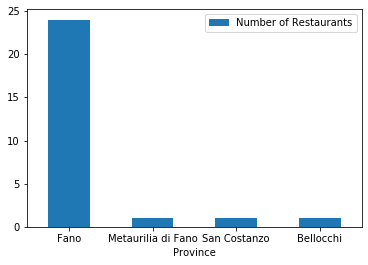

In [473]:
plot_df =  pd.DataFrame({'Province':['Fano','Metaurilia di Fano','San Costanzo', 'Bellocchi'], 'Number of Restaurants':[24, 1, 1,1]})

ax = plot_df.plot.bar(x = 'Province',y ='Number of Restaurants', rot = 0)

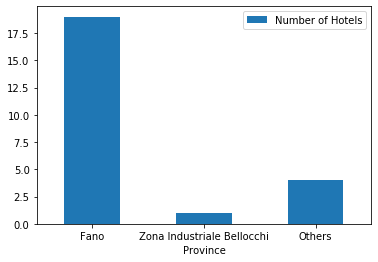

In [497]:
plot_df_hotel =  pd.DataFrame({'Province':['Fano','Zona Industriale Bellocchi','Others'], 'Number of Hotels':[19, 1, 4]})

ax = plot_df_hotel.plot.bar(x = 'Province',y ='Number of Hotels', rot = 0)

In [474]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [475]:
df.head()

,name,Location Address,Latitude,Longitude,City,State,Country
0,Ristorante Cinese Asia,Via Carlo Pisacane 106,43.839841,13.029103,Fano,Marche,Italia
1,Il Cantinone Ristorante,60 Via Arco di Augusto,43.844461,13.016103,Fano,Marche,Italia
2,Ristorante Giapponese Cinese,Cristoforo Colombo,43.846983,13.019557,Fano,Marche,Italia
3,Ristorante Pizzeria hotel orfeo,"Corso Matteotti, 5",43.846098,13.013366,Fano,Marche,Italia
4,Ristorante Isolabelgatto,No data,43.854769,12.987914,Fano,Marche,Italia


In [492]:
# create map

"""
The city of fano is formed by 15 small suburbs
"""
k=15
fano_cluster = df.drop(['Location Address','City','State','Country','name'], axis = 1)
kmeans = KMeans(n_clusters = k, init = 'k-means++',random_state=3, n_init = 20).fit(fano_cluster)
kmeans.labels_
fano_cluster.insert(0, 'Cluster Labels', kmeans.labels_)


map_clusters = folium.Map(location=[43.844872 ,13.016880],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for cluster, lat, lon in zip(fano_cluster['Cluster Labels'], fano_cluster['Latitude'], fano_cluster['Longitude']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [291]:
df_hotel.head()

,name,Location Address,Latitude,Longitude,City,State,Country
0,Hotel Augustus,"Via Giacomo Puccini, 2",43.847470,13.012680,Fano,Marche,Italia
1,Hotel Amelia Meta Inn,"Viale F.lli Cairoli, 80",43.850760,13.013250,Fano,Marche,Italia
2,Hotel Continental Fano * * *,Viale Adriatico 148,43.845113,13.026695,Fano,Marche,Italia
3,Hotel Elisabeth Due Maestrale Srl,"Piazzale Amendola, 2",43.850800,13.010730,Fano,Marche,Italia
4,Hotel Siri,"Viale Buozzi, 69",43.845924,13.012531,Fano,Marche,Italia


In [507]:
# create map

k=6
fano_cluster_hotel = df_hotel.drop(['Location Address','City','State','Country','name'], axis = 1)
kmeans = KMeans(n_clusters = k, init = 'k-means++',random_state=3, n_init = 20).fit(fano_cluster_hotel)
kmeans.labels_
fano_cluster_hotel.insert(0, 'Cluster Labels', kmeans.labels_)

map_clusters = folium.Map(location=[43.844872 ,13.016880],zoom_start=10)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for cluster, lat, lon in zip(fano_cluster_hotel['Cluster Labels'], fano_cluster_hotel['Latitude'], fano_cluster_hotel['Longitude']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Conclusion:

* The most probable location to open an restaurant in Fano is where the biggest Tourist activity density, this regions are the most likely to be crouded of tourists, they are: Lido, Sassonia and North of Centro storico. Withim them, the Sassonia region is the one with highest tourist density. So this suggest that a new restaurant in the Sassonia region may be more profitable.

* Regarding hotels, the region of Lido in Fano is quite dense in Hotels and with a lot of restaurants around. This indicates that, altought the high density of restaurants in Lido, opening a hotel there might not be as profitable due to the high competition. However, north of Sassonia have a relevant restaurant density with a very low hotel density, indicating that it may be more profitable opening a restaurant in this region.